In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from matplotlib import font_manager
f_path = "C:\Windows\Fonts\malgun.ttf"
font_manager.FontProperties(fname=f_path).get_name()
from matplotlib import rc
rc('font', family='Malgun Gothic')

import warnings
warnings.filterwarnings('ignore')

In [65]:
movie = pd.read_csv('./datas/final_movie_Rev2.csv', thousands=',', index_col=[0])
movie

,Movie,Producer,Distributor,Screen,Sales,Audience,Genre,Rate,Year,Month,Season,genre_encoded,log_sales,log_audience,log_screen
0,명량,김한민,씨제이이앤엠(주),1587,135748398910,17613682,사극,1,2014,7,3,11,25.634,16.684,7.370
1,극한직업,이병헌,씨제이이앤엠(주),1978,139647979516,16264944,코미디,1,2019,1,1,18,25.662,16.605,7.590
2,신과함께-죄와 벌,김용화,롯데쇼핑㈜롯데엔터테인먼트,1912,115698654137,14410754,판타지,0,2017,12,1,19,25.474,16.483,7.556
3,국제시장,윤제균,씨제이이앤엠(주),966,110828014630,14245998,드라마,0,2014,12,1,6,25.431,16.472,6.874
4,베테랑,류승완,씨제이이앤엠(주),1064,105024756250,13395400,액션,1,2015,8,3,15,25.377,16.410,6.971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
740,죽기 전에 해야할 몇가지 것들,박성범,(주)이모션픽처스,1,25278,4,드라마,0,2009,7,3,6,10.138,1.609,0.693
741,마음,최원석,(주)레드언더미디어,1,12000,2,드라마,1,2016,7,3,6,9.393,1.099,0.693
742,독고다이,이수성,(주)케이알씨지,1,1000,1,드라마,1,2019,6,3,6,6.909,0.693,0.693
743,어쩌다 옥탑방,최병욱,고구마콘텐츠허브(주),1,1000,1,SF,1,2019,4,2,0,6.909,0.693,0.693


In [ ]:
dele = movie[movie['Year'] == 2018].index
movie.drop(dele, inplace=True)

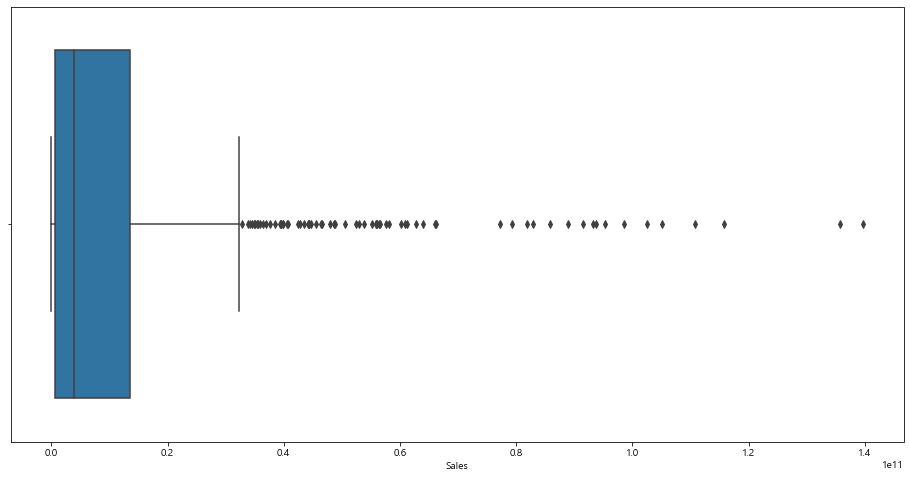

In [4]:
plt.figure(figsize=(16,8))
sns.boxplot(movie['Sales']);

In [27]:
fraud = movie['Sales']
quantile_25 = np.percentile(fraud.values, 25)
quantile_75 = np.percentile(fraud.values, 75)

iqr = quantile_75 - quantile_25
iqr_weight = iqr * 1.5
lowest_val = quantile_25 - iqr_weight
highest_val = quantile_75 + iqr_weight

outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index
outlier_index

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 66, 67, 68,
            80],
           dtype='int64')

In [28]:
movie.drop(outlier_index, axis=0, inplace=True)
movie

,Movie,Producer,Distributor,Screen,Sales,Audience,Genre,Rate,Year,Month,Season,genre_encoded,log_sales,log_audience,log_screen
65,연가시,박정우,씨제이이앤엠(주),759,32154766664,4513026,공포(호러),1,2012,7,3,3,24.194,15.322,6.633
69,용의자,원신연,(주)쇼박스,807,30037161000,4131248,액션,1,2013,12,1,15,24.126,15.234,6.695
70,건축학개론,이용주,롯데쇼핑㈜롯데엔터테인먼트,593,30219800500,4110645,멜로/로맨스,0,2012,3,2,7,24.132,15.229,6.387
71,7급 공무원,신태라,롯데쇼핑㈜롯데엔터테인먼트,475,26701311856,4088799,코미디,0,2009,4,2,18,24.008,15.224,6.165
72,댄싱퀸,이석훈,씨제이이앤엠(주),534,30129259500,4057546,코미디,0,2012,1,1,18,24.129,15.216,6.282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
740,죽기 전에 해야할 몇가지 것들,박성범,(주)이모션픽처스,1,25278,4,드라마,0,2009,7,3,6,10.138,1.609,0.693
741,마음,최원석,(주)레드언더미디어,1,12000,2,드라마,1,2016,7,3,6,9.393,1.099,0.693
742,독고다이,이수성,(주)케이알씨지,1,1000,1,드라마,1,2019,6,3,6,6.909,0.693,0.693
743,어쩌다 옥탑방,최병욱,고구마콘텐츠허브(주),1,1000,1,SF,1,2019,4,2,0,6.909,0.693,0.693


In [29]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 676 entries, 65 to 744
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Movie          676 non-null    object 
 1   Producer       676 non-null    object 
 2   Distributor    676 non-null    object 
 3   Screen         676 non-null    int64  
 4   Sales          676 non-null    int64  
 5   Audience       676 non-null    int64  
 6   Genre          676 non-null    object 
 7   Rate           676 non-null    int64  
 8   Year           676 non-null    int64  
 9   Month          676 non-null    int64  
 10  Season         676 non-null    int64  
 11  genre_encoded  676 non-null    int64  
 12  log_sales      676 non-null    float64
 13  log_audience   676 non-null    float64
 14  log_screen     676 non-null    float64
dtypes: float64(3), int64(8), object(4)
memory usage: 84.5+ KB


In [30]:
numerics = ['int64', 'float64']
movie_df = movie.select_dtypes(include=numerics)

In [31]:
X = movie_df.drop(['Sales', 'Audience', 'log_audience', 'log_sales'], axis=1)
y = movie_df['Sales']

In [32]:
from sklearn.model_selection import train_test_split
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [17]:
pred_tr = reg.predict(X_train)
pred_test = reg.predict(X_test)
rmse_tr = (np.sqrt(mean_squared_error(y_train, pred_tr)))
rmse_test = (np.sqrt(mean_squared_error(y_test, pred_test)))

print('RMSE of Train Data : ', rmse_tr)
print('RMSE of Test Data : ', rmse_test)

RMSE of Train Data :  4908816139.061516
RMSE of Test Data :  5048321447.12924


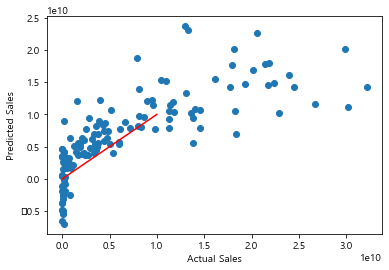

In [20]:
plt.scatter(y_test, pred_test)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.plot([0,10000000000], [0,10000000000], 'r');

In [89]:
movie = pd.read_csv('./datas/final_movie_Rev1.csv', thousands=',', index_col=[0])
movie.drop(columns=['제작사', '영화유형', '영화형태', '국적', '서울', '서울.1', '영화구분', '순번'], inplace=True)
movie.rename(columns={'전국': 'Screen', '전국.1': 'Sales', '전국.2': 'Audience', '영화명': 'Movie', '감독': 'Producer', '배급사': 'Distributor', '등급': 'Rate', '장르': 'Genre', '개봉일': 'Open'}, inplace=True)

In [90]:
movie['Open'] = pd.to_datetime(movie['Open'])
movie['Year'] = pd.DatetimeIndex(movie['Open']).year
movie['Month'] = pd.DatetimeIndex(movie['Open']).month
movie.drop(columns=['Open'], inplace=True)
movie['Season'] = [(month%12 + 3)//3 for month in movie['Month']]

In [91]:
movie = pd.concat([movie, pd.get_dummies(movie['Rate'], prefix='rate')], axis=1)
movie.drop(['Rate'], axis=1, inplace=True)

In [92]:
movie = pd.concat([movie, pd.get_dummies(movie['Genre'], prefix='genre')], axis=1)
movie.drop(['Genre'], axis=1, inplace=True)

In [93]:
movie = pd.concat([movie, pd.get_dummies(movie['Season'], prefix='season')], axis=1)
movie.drop(['Season'], axis=1, inplace=True)

In [94]:
movie

,Movie,Producer,Distributor,Screen,Sales,Audience,Year,Month,rate_12세이상관람가,rate_15세이상관람가,...,genre_애니메이션,genre_액션,genre_어드벤처,genre_전쟁,genre_코미디,genre_판타지,season_1,season_2,season_3,season_4
0,명량,김한민,씨제이이앤엠(주),1587,135748398910,17613682,2014,7,0,1,...,0,0,0,0,0,0,0,0,1,0
1,극한직업,이병헌,씨제이이앤엠(주),1978,139647979516,16264944,2019,1,0,1,...,0,0,0,0,1,0,1,0,0,0
2,신과함께-죄와 벌,김용화,롯데쇼핑㈜롯데엔터테인먼트,1912,115698654137,14410754,2017,12,1,0,...,0,0,0,0,0,1,1,0,0,0
3,국제시장,윤제균,씨제이이앤엠(주),966,110828014630,14245998,2014,12,1,0,...,0,0,0,0,0,0,1,0,0,0
4,베테랑,류승완,씨제이이앤엠(주),1064,105024756250,13395400,2015,8,0,1,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
740,죽기 전에 해야할 몇가지 것들,박성범,(주)이모션픽처스,1,25278,4,2009,7,1,0,...,0,0,0,0,0,0,0,0,1,0
741,마음,최원석,(주)레드언더미디어,1,12000,2,2016,7,0,1,...,0,0,0,0,0,0,0,0,1,0
742,독고다이,이수성,(주)케이알씨지,1,1000,1,2019,6,0,1,...,0,0,0,0,0,0,0,0,1,0
743,어쩌다 옥탑방,최병욱,고구마콘텐츠허브(주),1,1000,1,2019,4,0,1,...,0,0,0,0,0,0,0,1,0,0


In [95]:
movie['log_sales'] = round(np.log1p(movie['Sales']), 3)
movie['log_audience'] = round(np.log1p(movie['Audience']), 3)
movie['log_screen'] = round(np.log1p(movie['Screen']), 3)

In [96]:
fraud = movie['Sales']
quantile_25 = np.percentile(fraud.values, 25)
quantile_75 = np.percentile(fraud.values, 75)

iqr = quantile_75 - quantile_25
iqr_weight = iqr * 1.5
lowest_val = quantile_25 - iqr_weight
highest_val = quantile_75 + iqr_weight

outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index
outlier_index

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 66, 67, 68,
            80],
           dtype='int64')

In [97]:
movie.drop(outlier_index, axis=0, inplace=True)

In [83]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 745 entries, 0 to 744
Data columns (total 39 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Movie           745 non-null    object 
 1   Producer        745 non-null    object 
 2   Distributor     745 non-null    object 
 3   Screen          745 non-null    int64  
 4   Sales           745 non-null    int64  
 5   Audience        745 non-null    int64  
 6   Year            745 non-null    int64  
 7   Month           745 non-null    int64  
 8   rate_12세이상관람가   745 non-null    uint8  
 9   rate_15세이상관람가   745 non-null    uint8  
 10  rate_전체관람가      745 non-null    uint8  
 11  rate_청소년관람불가    745 non-null    uint8  
 12  genre_SF        745 non-null    uint8  
 13  genre_가족        745 non-null    uint8  
 14  genre_공연        745 non-null    uint8  
 15  genre_공포(호러)    745 non-null    uint8  
 16  genre_기타        745 non-null    uint8  
 17  genre_다큐멘터리     745 non-null    uin

In [98]:
numerics = ['int64', 'float64', 'uint8']
movie_df = movie.select_dtypes(include=numerics)

In [99]:
X = movie_df.drop(['Sales', 'Audience', 'log_audience', 'log_sales'], axis=1)
y = movie_df['Sales']

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [101]:
pred_tr = reg.predict(X_train)
pred_test = reg.predict(X_test)
rmse_tr = (np.sqrt(mean_squared_error(y_train, pred_tr)))
rmse_test = (np.sqrt(mean_squared_error(y_test, pred_test)))

print('RMSE of Train Data : ', rmse_tr)
print('RMSE of Test Data : ', rmse_test)

RMSE of Train Data :  4737065257.5268135
RMSE of Test Data :  5093212229.532958


In [103]:
movie.groupby(['Year']).size()

Year
2008    10
2009    53
2010    63
2011    57
2012    62
2013    51
2014    58
2015    64
2016    58
2017    57
2018    71
2019    72
dtype: int64

In [109]:
pd.pivot_table(data = movie, values = "Audience", index = "Year", aggfunc = np.sum)

,Audience
Year,
2008,7261789
2009,41599199
2010,54464314
2011,47409727
2012,64051505
2013,51549984
2014,49586993
2015,47100167
2016,33377769


In [110]:
pd.pivot_table(data = movie, values = "Sales", index = "Year", aggfunc = np.sum)

,Sales
Year,
2008,48464604471
2009,287360790137
2010,402569341479
2011,351521952500
2012,470452951001
2013,367500884738
2014,381722967859
2015,368051303159
2016,261305828423


In [111]:
movie[movie['Year'] == 2008]

,Movie,Producer,Distributor,Screen,Sales,Audience,Year,Month,rate_12세이상관람가,rate_15세이상관람가,...,genre_전쟁,genre_코미디,genre_판타지,season_1,season_2,season_3,season_4,log_sales,log_audience,log_screen
76,과속스캔들,강형철,롯데쇼핑㈜롯데엔터테인먼트,405,25486062201,3892350,2008,12,1,0,...,0,1,0,1,0,0,0,23.961,15.175,6.006
93,쌍화점,유하,(주)쇼박스,499,22711932935,3328944,2008,12,0,0,...,0,0,0,1,0,0,0,23.846,15.018,6.215
619,달콤한 거짓말,정정화,씨제이엔터테인먼트,339,164795744,24276,2008,12,1,0,...,0,0,0,1,0,0,0,18.920,10.097,5.829
650,로맨틱 아일랜드,강철우,실버스푼,208,70955212,10569,2008,12,0,1,...,0,0,0,1,0,0,0,18.078,9.266,5.342
672,미안하다 독도야,최현묵,메가픽쳐스제이씨(주),61,20583543,3560,2008,12,0,0,...,0,0,0,1,0,0,0,16.840,8.178,4.127
697,미인도,전윤수,씨제이엔터테인먼트,463,2446871,974,2008,11,0,0,...,0,0,0,0,0,0,1,14.710,6.882,6.140
699,"좋은 놈, 나쁜 놈, 이상한 놈",김지운,씨제이엔터테인먼트,825,6793606,924,2008,7,0,1,...,0,0,0,0,0,1,0,15.731,6.830,6.717
729,미쓰 홍당무,이경미,(주)벤티지홀딩스,290,419608,89,2008,10,0,0,...,0,0,0,0,0,0,1,12.947,4.500,5.673
731,초감각 커플,김형주,필름메신저,6,421630,75,2008,11,1,0,...,0,0,0,0,0,0,1,12.952,4.331,1.946
738,1724 기방난동사건,여균동,(주)싸이더스,337,193121,28,2008,12,0,1,...,0,0,0,1,0,0,0,12.171,3.367,5.823
